<a href="https://colab.research.google.com/github/tevrat-aksoy/GlobalAIHubDLCourse/blob/main/Final%20Project/Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Image Classification

Hola !

Objective of this project is to implement the following models for the CIFAR100 image classification dataset.

### Importing packages 

In [1]:
# Import neccessary packages here
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.preprocessing import image


### Load data

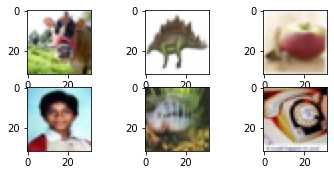

In [24]:
# Read images using built-in functions 
cifar100 = tf.keras.datasets.cifar100
num_classes=100

(X_train, y_train),(X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0



# Perform preprocessing (if any)
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()



In [3]:
y_train, y_test = y_train.flatten(), y_test.flatten() # changing size


###  Training parameters

In [4]:
class_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [5]:
# Mention the training parameters such as epochs, learning rate, number of samples etc.
batch_size = 32
epochs = 20
learning_rate=0.0001


## Training CNN for CIFAR100

In [6]:
# Design the model architecture here
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

### Compile

In [7]:
# Compile the model architecture here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Training

In [8]:
# Train the transfer learning model here
history =model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/20
1563/1563 [==============================] - 14s 7ms/step - loss: 4.4226 - accuracy: 0.0228 - val_loss: 4.0403 - val_accuracy: 0.0691
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8969 - accuracy: 0.0833 - val_loss: 3.5840 - val_accuracy: 0.1477
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.5701 - accuracy: 0.1392 - val_loss: 3.3375 - val_accuracy: 0.1929
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.3335 - accuracy: 0.1859 - val_loss: 3.1441 - val_accuracy: 0.2349
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.1704 - accuracy: 0.2159 - val_loss: 3.0408 - val_accuracy: 0.2578
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 3.0519 - accuracy: 0.2448 - val_loss: 3.0230 - val_accuracy: 0.2638
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9473 - accuracy: 0.2598 - val_loss: 2.9046 - val_ac

### Testing

In [9]:
# Test the transfer learning model with testing set
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


313/313 [==============================] - 1s 3ms/step - loss: 2.6283 - accuracy: 0.3400
Test score: 2.6283152103424072
Test accuracy: 0.3400000035762787


### Save

In [10]:
# Save the model to disk

model.save("cifar100_model.h")

INFO:tensorflow:Assets written to: cifar100_model.h/assets


### Inference

Saving download.jfif to download (9).jfif


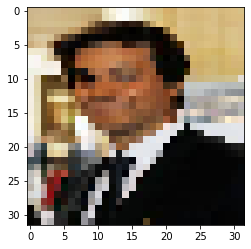

This image most likely belongs to boy


In [11]:


uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(32, 32))
  plt.imshow(img)
  plt.show()
  x=image.img_to_array(img)
  images=np.expand_dims(x, axis=0)
  
  classes = model.predict(images)


score = tf.nn.softmax(classes[0])

print(
    "This image most likely belongs to {}"
    .format(class_label[np.argmax(score)])
)
 



Cifar100 dataset contains 100 classes but train data for this too little. Because of this model underfit the data. Even if model trained for more epochs model start to overfit. This problem can be solved by more training data or image augmentation. 

### Further Fun



*   Experiment with different model architectures
*   Play with different parameters such as convolution size, pooling, padding, striding, epochs, dropout etc.
*   Train a Dense Neural Network as baseline and compare the performance

